In [3]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\patha\OneDrive\Desktop\Case studies\Sales Data\Sales+Data+for+Power+BI.xlsx"

# Load the Excel file and check available sheets
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)


Available sheets: ['Sales Data for Power BI']


In [4]:
# Load the sales data
df = pd.read_excel(file_path, sheet_name="Sales Data for Power BI")

# Display the first few rows
df.head()


,orderdate,ordernumber,productName,productLine,customerName,customer_city,customer_country,office_city,office_country,buyPrice,priceEach,QuantityOrdered,sales_value,cost_of_sales
0,2003-01-06,10100,1917 Grand Touring Sedan,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,86.70,136.00,30,4080.00,2601.00
1,2003-01-06,10100,1911 Ford Town Car,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,33.30,55.09,50,2754.50,1665.00
2,2003-01-06,10100,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,43.26,75.46,22,1660.12,951.72
3,2003-01-06,10100,1936 Mercedes Benz 500k Roadster,Vintage Cars,Online Diecast Creations Co.,Nashua,USA,Boston,USA,21.75,35.29,49,1729.21,1065.75
4,2003-01-09,10101,1932 Model A Ford J-Coupe,Vintage Cars,"Blauer See Auto, Co.",Frankfurt,Germany,London,UK,58.48,108.06,25,2701.50,1462.00


In [5]:
# Check data types and missing values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orderdate         2996 non-null   datetime64[ns]
 1   ordernumber       2996 non-null   int64         
 2   productName       2996 non-null   object        
 3   productLine       2996 non-null   object        
 4   customerName      2996 non-null   object        
 5   customer_city     2996 non-null   object        
 6   customer_country  2996 non-null   object        
 7   office_city       2996 non-null   object        
 8   office_country    2996 non-null   object        
 9   buyPrice          2996 non-null   float64       
 10  priceEach         2996 non-null   float64       
 11  QuantityOrdered   2996 non-null   int64         
 12  sales_value       2996 non-null   float64       
 13  cost_of_sales     2996 non-null   float64       
dtypes: datetime64[ns](1), fl

orderdate           0
ordernumber         0
productName         0
productLine         0
customerName        0
customer_city       0
customer_country    0
office_city         0
office_country      0
buyPrice            0
priceEach           0
QuantityOrdered     0
sales_value         0
cost_of_sales       0
dtype: int64

In [6]:
df.describe()


,orderdate,ordernumber,buyPrice,priceEach,QuantityOrdered,sales_value,cost_of_sales
count,2996,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,2004-05-14 19:22:40.213618176,10260.352804,54.576138,90.769499,35.218959,3205.671098,1928.675020
min,2003-01-06 00:00:00,10100.000000,15.910000,26.550000,6.000000,481.500000,243.600000
25%,2003-11-10 06:00:00,10181.000000,34.170000,62.000000,27.000000,1990.275000,1171.390000
50%,2004-06-16 00:00:00,10262.000000,53.930000,85.805000,35.000000,2880.240000,1724.540000
75%,2004-11-21 00:00:00,10338.250000,68.990000,114.650000,43.000000,4093.920000,2538.212500
max,2005-05-31 00:00:00,10425.000000,103.420000,214.300000,97.000000,11503.140000,7470.800000
std,NaN,92.476425,22.100868,36.582917,9.833885,1632.014682,986.525826


## Order Date Range: Orders span from Jan 6, 2003, to May 31, 2005.
Order Numbers: Start from 10100 and go up to 10425.
Buy Price & Selling Price:
Min buy price: ₹15.91, Max: ₹103.42
Min selling price: ₹26.55, Max: ₹214.30
Quantity Ordered: Varies between 6 and 97 per order.
Sales Value: Ranges from ₹481.50 to ₹11,503.14.
Cost of Sales: Lowest is ₹243.60, highest is ₹7,470.80.

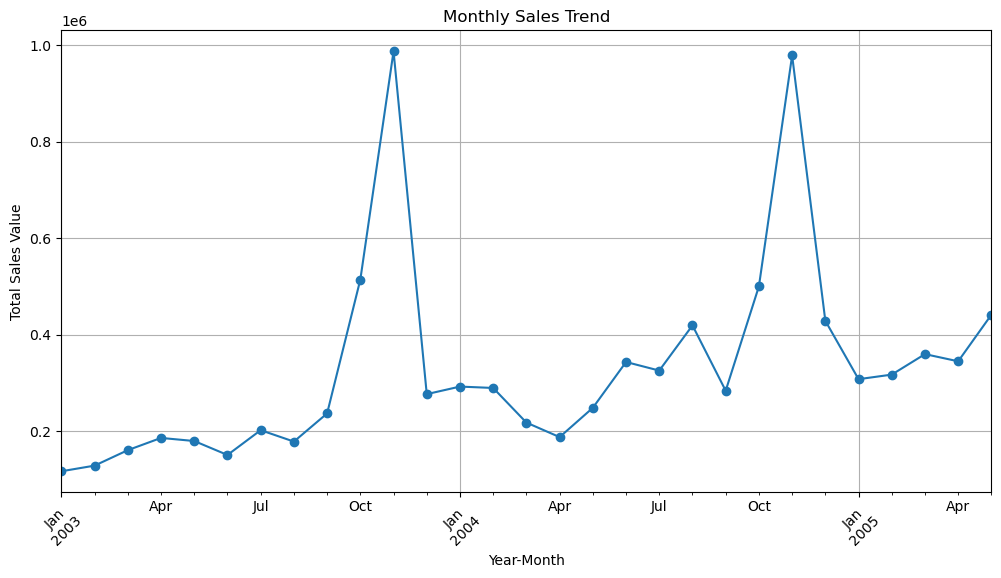

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/patha/OneDrive/Desktop/Case studies/Sales Data/Sales+Data+for+Power+BI.xlsx"
df = pd.read_excel(file_path, sheet_name='Sales Data for Power BI')

# Convert orderdate to datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])

# Extract year and month
df['YearMonth'] = df['orderdate'].dt.to_period('M')

# Group by Year-Month and sum sales_value
sales_trend = df.groupby('YearMonth')['sales_value'].sum()

# Plot the sales trend
plt.figure(figsize=(12,6))
sales_trend.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()


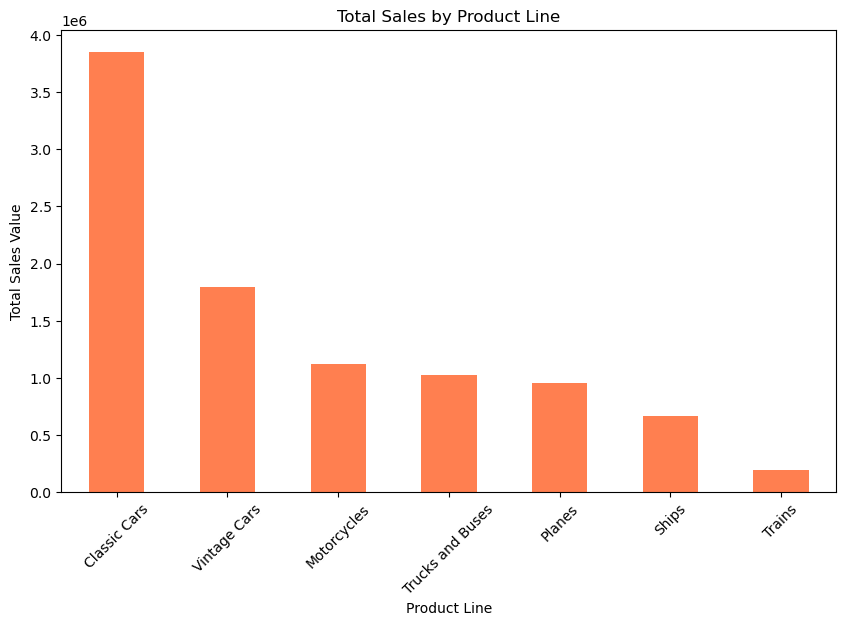

In [8]:
# Sales by Product Line
plt.figure(figsize=(10, 6))
df.groupby("productLine")["sales_value"].sum().sort_values(ascending=False).plot(kind="bar", color="coral")
plt.xlabel("Product Line")
plt.ylabel("Total Sales Value")
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


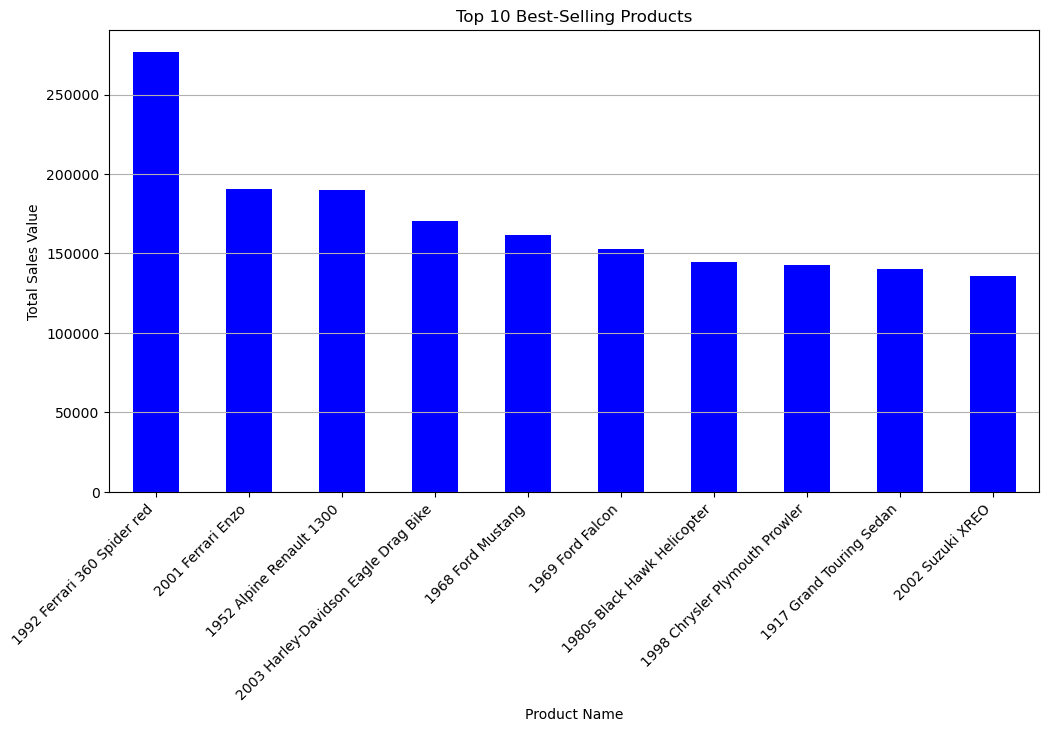

In [10]:
# Top 10 Best-Selling Products
top_products = df.groupby("productName")["sales_value"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="blue")
plt.xlabel("Product Name")
plt.ylabel("Total Sales Value")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()


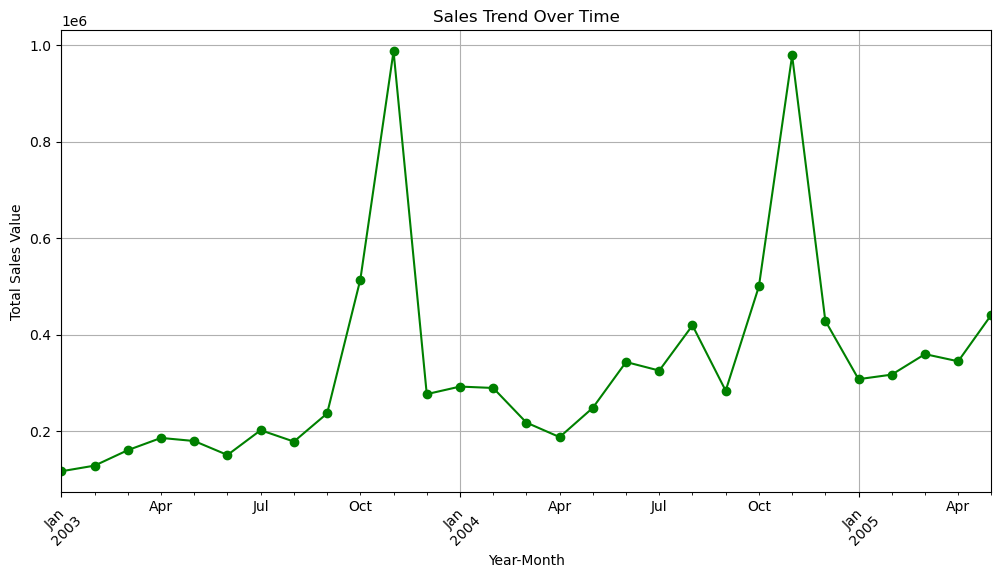

In [11]:
# Sales Trend Over Time
df["YearMonth"] = df["orderdate"].dt.to_period("M")
sales_trend = df.groupby("YearMonth")["sales_value"].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot(marker="o", linestyle="-", color="green")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Value")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()
